# Introdução:

### Problema de negócio:


É um projeto de ciência de dados que envolve o programa de fidelidade de uma companhia aérea. O programa tem três tipos de cartões: Star, Nova e Aurora, que oferecem diferentes benefícios e prêmios aos passageiros. O desafio  é determinar a probabilidade de cada cliente assinar cada cartão, para que o time comercial possa fazer a oferta mais adequada e aumentar as vendas.



In [ ]:
#iniciar a conexão com o banco de dados.
import sqlite3
import pandas as pd
conn = sqlite3.connect("database.db")

In [ ]:
#fechar a conexao
#conn.close()

In [ ]:
# tabela flight_activity

conn_atividade = """

SELECT
*
FROM flight_activity fa



"""
df_att = pd.read_sql_query(conn_atividade , conn)

In [ ]:
df_att.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [ ]:
#Tabela flight_loyalty_history


conn_atividade = """

SELECT
 *
FROM
  flight_loyalty_history flh



"""
df_flh = pd.read_sql_query(conn_atividade , conn)


In [ ]:
df_flh.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [ ]:
#juntando as tabelas == flight_activity e flight_loyalty_history

conn_atividade = """

SELECT
 *
FROM
  flight_activity fa LEFT JOIN flight_loyalty_history flh ON ( fa.loyalty_number = flh.loyalty_number )



"""
df= pd.read_sql_query(conn_atividade , conn)

# explorar os dados

In [ ]:
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [ ]:
df.isna().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
loyalty_number                      0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

In [ ]:
df_object = df.select_dtypes(include = 'object')

In [ ]:
df_object.head()

,country,province,city,postal_code,gender,education,marital_status,loyalty_card,enrollment_type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard
2,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard
3,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard
4,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard


In [ ]:
df_num = df.select_dtypes(include = 'number')

In [ ]:
df_num.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,loyalty_number,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,100018,92552.0,7919.20,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,100102,NaN,2887.74,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,100140,NaN,2838.07,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,100214,63253.0,4170.57,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,100272,91163.0,6622.05,2014,1,NaN,NaN


In [ ]:
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [ ]:
colunas = ["year", "month", "flights_booked" , "flights_with_companions", "total_flights", "distance", "points_accumulated", "salary", "clv" , "loyalty_card"  ]

In [ ]:
df_modelo = df.loc[: , colunas ]

In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     405624 non-null  int64  
 1   month                    405624 non-null  int64  
 2   flights_booked           405624 non-null  int64  
 3   flights_with_companions  405624 non-null  int64  
 4   total_flights            405624 non-null  int64  
 5   distance                 405624 non-null  int64  
 6   points_accumulated       405624 non-null  float64
 7   salary                   302952 non-null  float64
 8   clv                      405624 non-null  float64
 9   loyalty_card             405624 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 30.9+ MB


In [ ]:
df_modelo.isna().sum()

year                            0
month                           0
flights_booked                  0
flights_with_companions         0
total_flights                   0
distance                        0
points_accumulated              0
salary                     102672
clv                             0
loyalty_card                    0
dtype: int64

In [ ]:
(102672/df.shape[0])*100
#raciocinio foi verificar a proporção de valores nulos em relação ao total das linhas. Por ser 25%, a melhor decisão é excluir as linhas com os dados nulos

25.31211170936631

In [ ]:
df_modelo = df_modelo.dropna()

In [ ]:
df_modelo.shape

(302952, 10)

## Machine Learning

In [ ]:
from sklearn import tree as tr

In [ ]:
#definição do algoritmo
modelo = tr.DecisionTreeClassifier( max_depth = 5 )



In [ ]:
#treinamento do algoritmo
x_atributos = df_modelo.drop(columns = "loyalty_card")

y_rotulo = df_modelo['loyalty_card']

modelo_treinado = modelo.fit(x_atributos, y_rotulo )



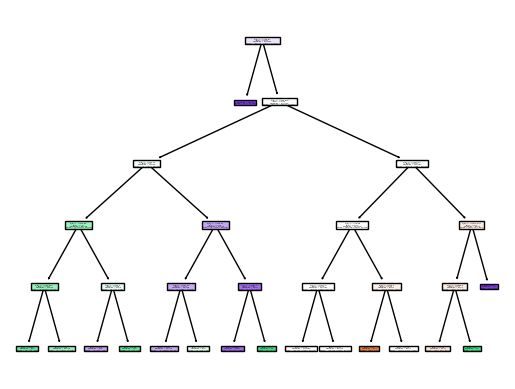

In [ ]:
tr.plot_tree(modelo_treinado, filled=True);

## Visualização dos resultados:

In [ ]:
x_atributos.sample()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv
285887,2018,5,3,3,6,1968,196.0,77999.0,8395.27


In [ ]:
x_atributos_sample = x_atributos.sample()
previsao = modelo_treinado.predict_proba(x_atributos_sample)


print("Prob- Aurora: {:.1f}% -Nova:{:.1f}% - Start:{:.1f}% ".format(previsao[0][0]*100, previsao[0][1]*100, previsao[0][2]*100))

Prob- Aurora: 33.9% -Nova:33.3% - Start:32.7% 


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np

In [ ]:
def predict(*args):
  x_atributos_sample = np.array([args]).reshape( 1, -1)
  previsao = modelo_treinado.predict_proba(x_atributos_sample)

  return {"Aurora":previsao[0][0], "Nova":previsao[0][1],"Start":previsao[0][2] }


with gr.Blocks() as demo:
  #titulo
  gr.Markdown(""" ## Propensão de compra """)

  with gr.Row():
    with gr.Column():
      gr.Markdown(""" ## Atributos do cliente """)
      year                            = gr.Slider( label="year", minimum=2017, maximum= 2018, step=1, randomize=True )
      month                           = gr.Slider( label="month", minimum=1, maximum=12, step=1, randomize=True )
      flights_booked                  = gr.Slider( label="flights booked", minimum=0, maximum=21, step=1, randomize=True )
      flights_with_companions         = gr.Slider( label="flights with companions", minimum=0, maximum=11, step=1, randomize=True )
      total_flights                   = gr.Slider( label="total flights", minimum=0, maximum=32, step=1, randomize=True )
      distance                        = gr.Slider( label="distance", minimum=0 ,maximum= 6293 ,step = 1 ,randomize= True)
      points_accumulated              = gr.Slider( label= "points accumulated",minimum= 0.00 ,maximum= 676.50 ,step= 0.1 ,randomize= True)
      salary                          = gr.Slider( label= "salary" ,minimum =54886.00,maximum= 407228.00 ,step= 0.1 ,randomize= True)
      clv                             = gr.Slider( label= "clv" ,minimum =2119.89,maximum = 83325.38, step = 0.1,randomize= True)

      with gr.Row():
        with gr.Row():
          gr.Markdown(""" ## Botão de previsão """)
          predict_btn = gr.Button(value="Previsao")

    with gr.Column():
      gr.Markdown(""" ## Propensão de compra do cliente  """)
      label = gr.Label()

  #botao
  predict_btn.click(
      fn = predict,
      inputs =[
          year,
          month,
          flights_booked,
          flights_with_companions,
          total_flights,
          distance,
          points_accumulated,
          salary,
          clv
          ],
      outputs = [label] )

demo.launch(debug= True , share=False )

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
